In [1]:
import numpy as np
import pandas as pd
from pysr import PySRRegressor
from IPython.display import HTML
from matplotlib import pyplot as plt

In [2]:
df_clean = pd.read_csv('clean_table_MBH.csv')

In [3]:
nanpercent=0.16
cols_to_delete = df_clean.columns[df_clean.isnull().sum()/len(df_clean) > nanpercent]
df_lessnan=df_clean.drop(cols_to_delete, axis = 1)
df_purge=df_lessnan.dropna(axis='index',how='any')
print(df_purge.columns)
print(len(df_purge.columns))
#HTML(df_purge.to_html())

Index(['T-type', 'Bar', 'Disk', 'Core', 'AGN', 'Pseudobulge', 'M_BH',
       'M_BH_std', 'M*_sph', 'M*_gal', 'log_B/T', 'log_sigma0',
       'log_R_e_sph_maj', 'log_R_e_sph_eq_kpc', 'log_n_sph_maj',
       'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new', 'log_Rho_soi_exact_new',
       'Avg_Rho_Re_Exact_all', 'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all',
       'Rho_re_Exact_all', 'r_soi_2BH_approx', 'Rho_r_soi_2BH_approx',
       'Lo

In [4]:
## useful functions
def x2name(feature_list,df_handson):
    for ind in feature_list:
        i=int(ind[1:])
        print('x',i,':',df_handson.columns[i])

def rmse(y,y_pred,w):
    return np.sqrt(np.average((y-y_pred)**2,weights=w))

def df2name(df):
    for i in range(len(df.columns)):
        print('x',i,':',df.columns[i])

stellar mass $M*_{sph/gal}$,T-type

In [107]:
#df=df_purge[['M*_sph','M*_gal','T-type','log_R_e_sph_eq_kpc']]
df=df_purge[['M*_sph','T-type']]
#df=df_purge[['M*_gal','T-type']]
#df=df.rename(columns={"M*_sph": "M_star_sph"})

In [108]:
HTML(df.to_html())

,M*_sph,T-type
0,11.70,-3.2
1,11.69,-4.8
3,11.72,-4.9
5,10.43,-1.9
6,8.03,-2.8
7,10.88,-1.2
9,10.84,-4.8
10,10.33,-2.6
11,10.78,-0.6
12,10.95,-2.0


In [109]:
y = df_purge['M_BH'].to_numpy()
w = 1/df_purge['M_BH_std'].to_numpy()**2

#df_handson = df
X = df.to_numpy()
#X = df_handson


model = PySRRegressor(
    binary_operators=["+", "-", "*", "/","pow"],
    unary_operators=["exp","log10"],
    warm_start=False,
    denoise=False,
    niterations=40,
    ncyclesperiteration=550,
    precision=64,
)



model.fit(X=X, y=y, weights=w)

/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!

Cycles per second: 3.990e+04
Head worker occupation: 68.9%. This is high, and will prevent efficient resource usage. Increase `ncyclesperiteration` to reduce load on head worker.
Progress: 110 / 600 total iterations (18.333%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           8.643e-01  -1.000e-10  8.181178431413395
3           1.869e-01  7.655e-01  (x0 + -2.4058952782384777)
5           1.869e-01  -5.000e-11  ((x0 - 0.6151717985756959) + -1.7907234797979832)
7           1.632e-01  6.781e-02  ((x0 + -2.4045446315577186) + (x1 * -0.04100572586909105))
12          1.622e-01  1.337e-03  (exp(-0.3264580808695829 - exp(exp(x1) / 1.9079347619700808)) + (x0 + -2.4836380152514894))
14          1.594e-01  8.638e-03  (exp(-0.18389670562423346 - exp(exp(x1 + 0.7467313851479067) / 1.9079347619700808)) + (x0 + -2.4836380152514894))
15          1.577e-01  1.080e-02  (((0.7877801113686375 ^ x0) ^ -0.6443476651580128) + ((x0 - ((x1 +

PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                  8.181178431413395   
	1  >>>>  7.655107e-01                         (x0 + -2.4058952782384777)   
	2        4.996004e-16  ((x0 - 0.6151717985756959) + -1.7907234797979832)   
	3        6.781347e-02  ((x0 + -2.4045446315577186) + (x1 * -0.0410057...   
	4        1.154805e-02  ((x0 - (1.3982136016451954 ^ exp(-0.2522176410...   
	5        1.519593e-02  ((x0 - (1.3982136016451954 ^ exp(x1 / exp(exp(...   
	6        7.924220e-03  ((x0 - (1.3982136016451954 ^ exp((x1 / x0) / e...   
	7        7.981773e-05  ((x0 - (1.3982136016451954 ^ exp((x1 / (1.3982...   
	8        3.388587e-02  ((x0 - (exp(0.40849625182741933 / (x1 + (0.885...   
	9        4.534823e-03  ((x0 - (exp(0.24159157004317294 / (x1 + ((-1.0...   
	
	       loss  complexity  
	0  0.864250           1  
	1  0.186950           3  
	2  0.186950           5  
	3  0.163239  

In [110]:
df2name(df)

x 0 : M*_sph
x 1 : T-type


In [111]:
model

PySRRegressor.equations_ = [
	   pick         score                                           equation  \
	0        0.000000e+00                                  8.181178431413395   
	1  >>>>  7.655107e-01                         (x0 + -2.4058952782384777)   
	2        4.996004e-16  ((x0 - 0.6151717985756959) + -1.7907234797979832)   
	3        6.781347e-02  ((x0 + -2.4045446315577186) + (x1 * -0.0410057...   
	4        1.154805e-02  ((x0 - (1.3982136016451954 ^ exp(-0.2522176410...   
	5        1.519593e-02  ((x0 - (1.3982136016451954 ^ exp(x1 / exp(exp(...   
	6        7.924220e-03  ((x0 - (1.3982136016451954 ^ exp((x1 / x0) / e...   
	7        7.981773e-05  ((x0 - (1.3982136016451954 ^ exp((x1 / (1.3982...   
	8        3.388587e-02  ((x0 - (exp(0.40849625182741933 / (x1 + (0.885...   
	9        4.534823e-03  ((x0 - (exp(0.24159157004317294 / (x1 + ((-1.0...   
	
	       loss  complexity  
	0  0.864250           1  
	1  0.186950           3  
	2  0.186950           5  
	3  0.163239  

In [112]:
model.sympy()

x0 - 2.4058952782384777

In [113]:
for i in range(len(model.equations_)):
    display(model.sympy(index=i))

8.181178431413395

x0 - 2.4058952782384777

x0 - 2.4058952783736791

x0 - 0.04100572586909105*x1 - 2.4045446315577186

-1.3982136016451954**exp(-0.25221764102863586*exp(-x1)) + x0 - 1.184036509040525

-1.3982136016451954**exp(x1*exp(-exp(x1))) + x0 - 1.184036509040525

-1.3982136016451954**exp(x1*exp(-x1)/x0) + x0 - 1.184036509040525

-1.3982136016451954**exp(x1*exp(-x1)/(x0 + 1.3982136016451954)) + x0 - 1.184036509040525

x0 - 1.2619500858607682*exp(0.40849625182741933/(x1 + 0.885465161671702/(x1 + 1.1145385601523607))) - 1.0610671280095685

x0 - 1.2775172350362165*exp(0.24159157004317294/(x1 - 1.065106407627666*exp(-x0/x1)/x1)) - 1.1361409264468205

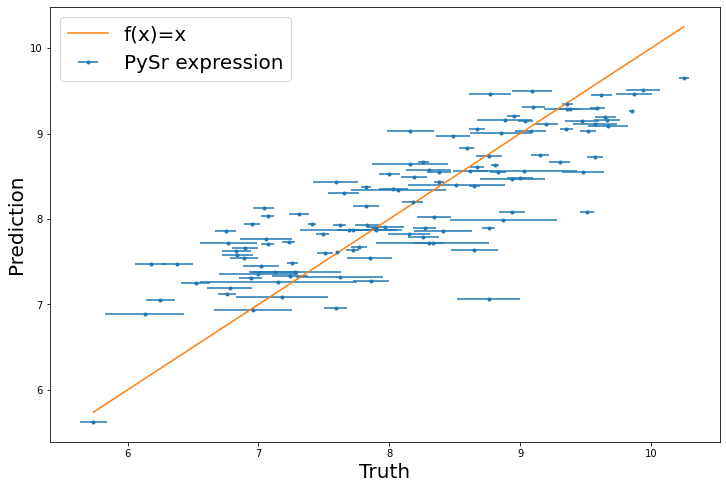

In [114]:
plt.figure(figsize=(12,8))
fontsize=20
#plt.scatter(y, model.predict(X),label='PySr expression')
plt.errorbar(y, model.predict(X),xerr=df_purge['M_BH_std'].to_numpy(),fmt='.',label='PySr expression')
plt.plot(np.linspace(y.min(),y.max()),np.linspace(y.min(),y.max()),label='f(x)=x')
plt.xlabel('Truth',fontsize=fontsize)
plt.ylabel('Prediction',fontsize=fontsize)
plt.legend(fontsize=fontsize)
plt.show()

In [115]:
rmse(y,model.predict(X),w)

0.4323770913461471

In [116]:
for i in range(len(model.equations_)):
    print(i,':',rmse(y,model.predict(X,index=i),w))

0 : 0.9296505481997017
1 : 0.4323770913461471
2 : 0.4323770913461472
3 : 0.4040281833284275
4 : 0.39480364579786587
5 : 0.39181530850343876
6 : 0.3902659645986678
7 : 0.39023481569895946
8 : 0.38367878868811667
9 : 0.3810777721191044


Bulge Equivalent Properties ($n_{eq,sph}$), T-type

In [129]:
#df=df_purge[['log_n_sph_eq','log_R_e_sph_eq_kpc','T-type']]
df=df_purge[['log_R_e_sph_eq_kpc','T-type']]

y = df_purge['M_BH'].to_numpy()
w = 1/df_purge['M_BH_std'].to_numpy()**2

#df_handson = df
X = df.to_numpy()
#X = df_handson


model = PySRRegressor(
    binary_operators=["+", "-", "*", "/","pow"],
    unary_operators=["exp","log10"],
    warm_start=False,
    denoise=False,
    niterations=40,
    ncyclesperiteration=550,
    precision=64,
)



model.fit(X=X, y=y, weights=w)

df2name(df)

/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!

Cycles per second: 3.520e+04
Head worker occupation: 35.9%. This is high, and will prevent efficient resource usage. Increase `ncyclesperiteration` to reduce load on head worker.
Progress: 117 / 600 total iterations (19.500%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           8.643e-01  -1.000e-10  8.18117843141262
3           3.574e-01  4.415e-01  (x0 + 7.979806199773191)
4           3.099e-01  1.427e-01  (exp(x0) + 6.802277717266399)
5           2.892e-01  6.911e-02  ((x0 / 0.6555725828269734) + 7.8740084293023465)
7           2.447e-01  8.342e-02  ((7.951616184243622 + x0) - (x1 * 0.07785415245581034))
8           2.442e-01  2.183e-03  ((x0 + 7.954756509305081) - (log10(1.2657070715345564) * x1))
10          2.436e-01  1.313e-03  ((x0 + 7.954756509305081) - (log10(1.2657070715345564) * (x1 * 0.7915109595160202)))
11          2.380e-01  2.299e-02  (((7.951616184243622 - (x0 * -0.15272401507909728)) + x0) - (x1 * 0.0

In [130]:
model.sympy()

exp(x0) + 6.78919932685496

In [131]:
rmse(y,model.predict(X),w)

0.5565059060323629

In [132]:
for i in range(len(model.equations_)):
    print('Eq.',i,'rmse:',rmse(y,model.predict(X,index=i),w))
    display(model.sympy(index=i))

Eq. 0 rmse: 0.9296505481997017


8.181178430556228

Eq. 1 rmse: 0.5978281108696734


x0 + 7.979806199773269

Eq. 2 rmse: 0.5565059060323629


exp(x0) + 6.78919932685496

Eq. 3 rmse: 0.5377522044990296


1.52538410878591*x0 + 7.8740084293023465

Eq. 4 rmse: 0.4914229804648344


x0 - 0.08982729913987195*x1 + 7.979806199773191

Eq. 5 rmse: 0.4893612603763556


1.089827299139872*x0 - 0.08982729913987195*x1 + 7.979806199773191

Eq. 6 rmse: 0.4878812072979079


1.1527240150790973*x0 - 0.07785415245581034*x1 + 7.951616184243622

Eq. 7 rmse: 0.4868575348688704


-0.08982729913987195*0.21452098477571635**x0 + x0 - 0.08982729913987195*x1 + 8.06686945464037

Eq. 8 rmse: 0.4813145439345093


x0 - 0.9103898984436592*exp(-0.9772922792306974*x0 + 0.4886461396153487*x1)**0.1974686149744816 + 8.935692752383913

Eq. 9 rmse: 0.4810269067766025


x0 + exp(exp(0.7066753562382363*(1 + 0.29516547762463385*exp(-exp(x1 - exp(x0))))**0.2302380837668566))

Eq. 10 rmse: 0.47728322203583556


x0 + 0.5388024092486668*x0/(x1*(x1 - 0.4954330263669682)) - 0.085247193496337299*x1 + 7.995822312243745

Eq. 11 rmse: 0.47378896791362934


x0 + exp(exp(0.70934231207573046*(1 + 0.2862741692828116*exp(-exp(-x0 + x1 - exp(x0))))**0.24707386117530053))

Eq. 12 rmse: 0.47234929939534226


x0 + exp(exp(0.7442703042119112*(0.27577099272793676**exp(0.19645230478919743*exp(-2*x0 + x1)) + 0.787348670200528)**0.2114859997190267))

In [136]:
def test_relation(df):
    y = df_purge['M_BH'].to_numpy()
    w = 1/df_purge['M_BH_std'].to_numpy()**2

    #df_handson = df
    X = df.to_numpy()
    #X = df_handson


    model = PySRRegressor(
        binary_operators=["+", "-", "*", "/","pow"],
        unary_operators=["exp","log10"],
        warm_start=False,
        denoise=False,
        niterations=40,
        ncyclesperiteration=550,
        precision=64,
    )



    model.fit(X=X, y=y, weights=w)

    print('parameters:')
    df2name(df)
    
    print('Eq. selected rmse:',rmse(y,model.predict(X),w))
    display(model.sympy())
    
    for i in range(len(model.equations_)):
        print('Eq.',i,'rmse:',rmse(y,model.predict(X,index=i),w))
        display(model.sympy(index=i))

velocity dispersion($\sigma$),T-type 

In [134]:
df_purge.columns

Index(['T-type', 'Bar', 'Disk', 'Core', 'AGN', 'Pseudobulge', 'M_BH',
       'M_BH_std', 'M*_sph', 'M*_gal', 'log_B/T', 'log_sigma0',
       'log_R_e_sph_maj', 'log_R_e_sph_eq_kpc', 'log_n_sph_maj',
       'log_n_sph_eq', 'log(I_e,sph,maj/M_Sun/pc^2)',
       'log(I_e,sph,eq/M_Sun/pc^2)', 'Concentration_Index',
       'avg_Rho_1kpc_Exact_All', 'r1_density_approx', 'log10(R10_kpc)',
       'logRho_R10_approx', 'log_rho10_Exact', 'log10(R90_kpc)',
       'logRho_R90_approx', 'log_rho_90_Exact_all', 'Rho_re_spatial',
       'SR_pc_All', 'Rho_SR_pc_All', 'CR_def1_approx_new',
       'Rho_cr_def1_approx_new', 'CR_def2_approx_new',
       'Rho_CR_def2_approx_new', 'Sr(pc)_2_using_Falserm_drho',
       'Log_Approx_Avg_density_10pc', 'log_Rho_e_Exact_new',
       'logRho_e_approx_New', 'logRho_soi_approx_new', 'log_Rho_soi_exact_new',
       'Avg_Rho_Re_Exact_all', 'Avg_Rho_soi_exact_all', 'Avg_Rho_re_Exact_all',
       'Rho_re_Exact_all', 'r_soi_2BH_approx', 'Rho_r_soi_2BH_approx',
       'Lo

In [139]:
test_relation(df_purge[['log_sigma0','T-type', 'Bar', 'Disk', 'Core', 'AGN', 'Pseudobulge']])

/home/zj448/miniconda3/lib/python3.9/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!

Cycles per second: 2.880e+04
Head worker occupation: 48.3%. This is high, and will prevent efficient resource usage. Increase `ncyclesperiteration` to reduce load on head worker.
Progress: 81 / 600 total iterations (13.500%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           8.643e-01  -1.000e-10  8.181178431415788
3           2.979e-01  5.326e-01  (x0 / 0.2850416487894404)
5           1.511e-01  3.393e-01  ((x0 / 0.2850416487894404) + x4)
14          1.435e-01  5.781e-03  ((((x0 / 0.26390828473318634) + x0) + log10(log10(exp(3.2343835589954257 - x6)))) - 2.7609197080450265)
15          1.109e-01  2.570e-01  (((((x0 + (x0 + -0.15201944717701074)) * 2.1914873763508678) + (x4 + 1.7577106910083062)) - x6) * 0.7267355577803917)
17          1.002e-01  5.096e-02  ((((x0 + x0) * 2.1914873763508678) + ((((0.3698666141980174 ^ x6) + 0.3698666141980174) * 0.8994209106164789) + x4)) * 0.7267355577803917)
19          9.862e-02  7

3.612011358092554*x0 + 0.54512111722068081*x4 - 0.54512111722068081*x6

Eq. 0 rmse: 0.9296505481997017


8.181178431415788

Eq. 1 rmse: 0.47655061352583516


3.6256121599766914*x0

Eq. 2 rmse: 0.38871004871801657


3.5108233508583323*x0 + x4

Eq. 3 rmse: 0.37180486080025044


3.542454183426922*x0 + 0.7244432374590107*x4

Eq. 4 rmse: 0.35309849486168643


3.5462610281042842*x0 + x4 - 0.39445872811509464*x6

Eq. 5 rmse: 0.30794788087163205


3.612011358092554*x0 + 0.54512111722068081*x4 - 0.54512111722068081*x6

Eq. 6 rmse: 0.30688164957825725


1.019806760387542*1.3015727913642006**(x3/x1)*(0.5109445048877361*x4 - 0.5109445048877361*x6) + 3.6165009705596241*x0